# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ECON441B/insurance.csv')

In [ ]:
df.loc[df['sex'] == 'female', 'sex'] =1.
df.loc[df['sex'] == 'male', 'sex'] = 0.
df.loc[df['smoker'] == 'yes', 'smoker'] =1.
df.loc[df['smoker'] == 'no', 'smoker'] = 0.
df["southwest"] = df['region']
df["northwest"] = df['region']
df["southeast"] = df['region']

df.loc[df['southwest'] == 'southwest', 'southwest'] = 1.
df.loc[df['southwest'] == 'northwest', 'southwest'] = 0.
df.loc[df['southwest'] == 'southeast', 'southwest'] = 0.
df.loc[df['southwest'] == 'northeast', 'southwest'] = 0.

df.loc[df['northwest'] == 'southwest', 'northwest'] = 0.
df.loc[df['northwest'] == 'northwest', 'northwest'] = 1.
df.loc[df['northwest'] == 'southeast', 'northwest'] = 0.
df.loc[df['northwest'] == 'northeast', 'northwest'] = 0.

df.loc[df['southeast'] == 'southwest', 'southeast'] = 0.
df.loc[df['southeast'] == 'northwest', 'southeast'] = 0.
df.loc[df['southeast'] == 'southeast', 'southeast'] = 1.
df.loc[df['southeast'] == 'northeast', 'southeast'] = 0.


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,southwest,northwest,southeast
0,19,1.0,27.900,0,1.0,southwest,16884.92400,1.0,0.0,0.0
1,18,0.0,33.770,1,0.0,southeast,1725.55230,0.0,0.0,1.0
2,28,0.0,33.000,3,0.0,southeast,4449.46200,0.0,0.0,1.0
3,33,0.0,22.705,0,0.0,northwest,21984.47061,0.0,1.0,0.0
4,32,0.0,28.880,0,0.0,northwest,3866.85520,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,0.0,northwest,10600.54830,0.0,1.0,0.0
1334,18,1.0,31.920,0,0.0,northeast,2205.98080,0.0,0.0,0.0
1335,18,1.0,36.850,0,0.0,southeast,1629.83350,0.0,0.0,1.0
1336,21,1.0,25.800,0,0.0,southwest,2007.94500,1.0,0.0,0.0


In [ ]:
import numpy as np

In [ ]:
df_subset = df[['age', 'sex', 'bmi', 'children', 'smoker', 'southwest', 'northwest', 'southeast']]

In [ ]:
data = np.array(df_subset)
target = np.array(df.iloc[:, 6])

In [ ]:
data

array([[19, 1.0, 27.9, ..., 1.0, 0.0, 0.0],
       [18, 0.0, 33.77, ..., 0.0, 0.0, 1.0],
       [28, 0.0, 33.0, ..., 0.0, 0.0, 1.0],
       ...,
       [18, 1.0, 36.85, ..., 0.0, 0.0, 1.0],
       [21, 1.0, 25.8, ..., 1.0, 0.0, 0.0],
       [61, 1.0, 29.07, ..., 0.0, 1.0, 0.0]], dtype=object)

In [ ]:
target

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# 2.) Split the data into 80/20, in/out sample

In [ ]:
cut = int((len(data) * .8) // 1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

In [ ]:
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale,in_target)

In [ ]:
a = modCV.alpha_

In [ ]:
a

115.9799859390741

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model1=Lasso(alpha = a).fit(in_data_scale,in_target)
model1.predict(np.array(in_data_scale))
model1.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 ,   -0.        , -158.68185954])

# 6.) Visualize the coefficients 

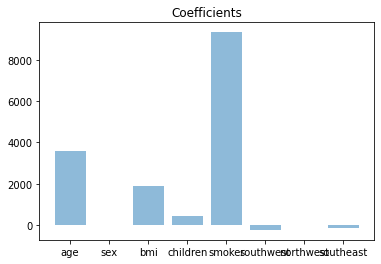

In [ ]:
objects = ('age', 'sex', 'bmi', 'children', 'smoker', 'southwest', 'northwest', 'southeast')
y_pos = np.arange(len(objects))
plt.bar(y_pos, model1.coef_, align='center', alpha=0.5)
plt.xticks(y_pos,objects)
plt.title('Coefficients')
plt.show()

# 7.) Interpret the coefficients

(1) Age has significantly influence the spending in health insurance, older people tend to spend more on it.

(2) Sex has no influence on insurance spending.

(3) BMI has significantly influence the spending in health insurance, people with higher BMI indicator tend to spend more on insurance.

(4) Smokers are have largest contribution when consider to spend on health insurance.

(5) People live in northeast (which is the base group) are more likely to spend on health insurance.

# 8.) Compare in and out of sample MSE’s

In [ ]:
in_y_pred=model1.predict(np.array(in_data_scale))
out_y_pred=model1.predict(np.array(out_data_scale))

In [ ]:
from sklearn.metrics import mean_squared_error
out_sample_mse = mean_squared_error(out_y_pred,out_target)
in_sample_mse=mean_squared_error(in_y_pred,in_target)

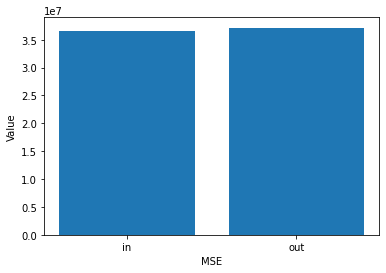

In [ ]:
plt.bar(["in","out"],[in_sample_mse,out_sample_mse])
plt.xlabel("MSE")
plt.ylabel("Value")
plt.show()